<h1>Meteorite landings. Обучение нейронной сети.</h1>

В данной работе используются данные о метеоритах упавших на Землю. Они классифицируются по составу и методу обнаружения. 
По составу имеются классы : L6 (18%), Н5 (16%) и 30289 других классов (66%).
По методу обнаружения: падения (когда метеорит находят после наблюдения его падения в атмосфере) и находки (когда метеоритное происхождение материала определяется только путём анализа).
Второй способ классификации будет более информативным и конкретным для данной выборки, поэтому я буду использовать его в данной работе.

<div class="alert alert-block alert-info">
<b>Подключение необходимых библиотек</b></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

<div class="alert alert-block alert-info">
<b>Чтение и разбор данных</b></div>

In [2]:
data = pd.read_csv('meteorite-landings.csv', sep=',', header=0,  engine='python')

In [3]:
data


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [4]:
print(data)

             name     id nametype              recclass      mass   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong               GeoLocation  
0      1880.0  50.77500 

In [5]:
data.describe()


,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


<div class="alert alert-block alert-info">
<b>Обработка выбросов</b></div>


<h4><em>Рассмотрим столбцы reclong и reclat.</em></h4>

c:\users\netwe\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


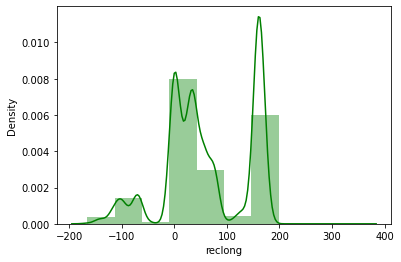

In [6]:
sns.distplot(data['reclong'], color='green',bins = 10)
pass

c:\users\netwe\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


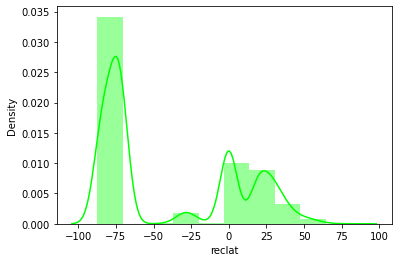

In [7]:
sns.distplot(data['reclat'], color='lime', bins = 10)
pass

<em>Видно, что имеется немного значений больше 180 в reclong, что не соответсвует реальности. Уберем их:</em>

In [8]:
rows_to_drop = data[
    (data['reclong'] < -180) | (data['reclong'] > 180)].index
data = data.drop(rows_to_drop)
data.shape

(45715, 10)

<h4><em>Рассмотрим столбец year.</em></h4>

c:\users\netwe\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


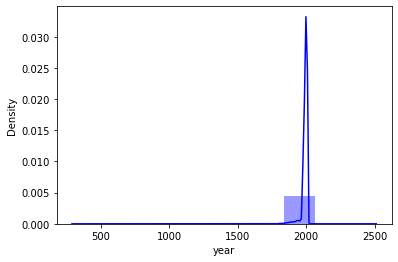

In [9]:
sns.distplot(data['year'],color='blue', bins = 10)
pass

<em>Также избавимся от значений >2021 года:</em>

In [10]:
rows_to_drop = data[
    (data['year'] > 2021)].index
data = data.drop(rows_to_drop)
data.shape

(45713, 10)

<div class="alert alert-block alert-info">
<b>Обработка пропущенных значений</b></div>

In [11]:
data

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


<em>Удалим строки, содержащие пустые значения:</em>

In [12]:
data.dropna(axis = 0)


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


<em>45713-38115 = 7598 строк, содержат пустые значения.</em>


<em>Разделим столбцы, содержащие категориальные и числовые признаки:</em>

In [13]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['name', 'nametype', 'recclass', 'fall', 'GeoLocation']
['id', 'mass', 'year', 'reclat', 'reclong']


In [14]:
for c in categorical_columns:
    print(c, data[c].unique())

name ['Aachen' 'Aarhus' 'Abee' ... 'Zlin' 'Zubkovsky' 'Zulu Queen']
nametype ['Valid' 'Relict']
recclass ['L5' 'H6' 'EH4' 'Acapulcoite' 'L6' 'LL3-6' 'H5' 'L' 'Diogenite-pm'
 'Unknown' 'H4' 'H' 'Iron, IVA' 'CR2-an' 'LL5' 'CI1' 'L/LL4'
 'Eucrite-mmict' 'CV3' 'Ureilite-an' 'Stone-uncl' 'L3' 'Angrite' 'LL6'
 'L4' 'Aubrite' 'Iron, IIAB' 'Iron, IAB-sLL' 'Iron, ungrouped' 'CM2' 'OC'
 'Mesosiderite-A1' 'LL4' 'C2-ung' 'LL3.8' 'Howardite' 'Eucrite-pmict'
 'Diogenite' 'LL3.15' 'LL3.9' 'Iron, IAB-MG' 'H/L3.9' 'Iron?' 'Eucrite'
 'H4-an' 'L/LL6' 'Iron, IIIAB' 'H/L4' 'H4-5' 'L3.7' 'LL3.4'
 'Martian (chassignite)' 'EL6' 'H3.8' 'H3-5' 'H5-6' 'Mesosiderite' 'H5-7'
 'L3-6' 'H4-6' 'Ureilite' 'Iron, IID' 'Mesosiderite-A3/4' 'CO3.3' 'H3'
 'EH3/4-an' 'Iron, IIE' 'L/LL5' 'H3.7' 'CBa' 'H4/5' 'H3/4' 'H?' 'H3-6'
 'L3.4' 'Iron, IAB-sHL' 'L3.7-6' 'EH7-an' 'Iron' 'CR2' 'CO3.2' 'K3' 'L5/6'
 'CK4' 'Iron, IIE-an' 'L3.6' 'LL3.2' 'CO3.5' 'Lodranite' 'Mesosiderite-A3'
 'L3-4' 'H5/6' 'Pallasite, PMG' 'Eucrite-cm' 'Pallasi

<em>Выберем средние значения по столбцам и заполним ими пропущенные в числовых признаках:</em>

In [15]:
data.median(axis = 0, numeric_only=True)

id         24261.00000
mass          32.60000
year        1998.00000
reclat       -71.50000
reclong       35.66667
dtype: float64

In [16]:
data = data.fillna(data.median(axis = 0, numeric_only=True), axis = 0)

In [17]:
data[numerical_columns].count(axis = 0)

id         45713
mass       45713
year       45713
reclat     45713
reclong    45713
dtype: int64

<em>Теперь в данных столбцах нет пропущенных значений.</em>

<em>Сделаем тоже самое с категориальными признаками.</em>

In [18]:
data[categorical_columns].count(axis = 0)

name           45713
nametype       45713
recclass       45713
fall           45713
GeoLocation    38398
dtype: int64

<em>В столбце Geolocation не хватает 45713-38398=7315 значений. Заполним их:</em>

In [19]:
data['GeoLocation'].describe()

count                    38398
unique                   17098
top       (0.000000, 0.000000)
freq                      6213
Name: GeoLocation, dtype: object

In [20]:
data.loc[data.GeoLocation == "?", 'GeoLocation'] = None

In [21]:
data.describe(include = [object])

,name,nametype,recclass,fall,GeoLocation
count,45713,45713,45713,45713,38398
unique,45713,2,466,2,17098
top,Aachen,Valid,L6,Found,"(0.000000, 0.000000)"
freq,1,45638,8285,44606,6213


In [22]:
type(data['GeoLocation'].describe())

pandas.core.series.Series

In [23]:
data['GeoLocation'].describe().top

'(0.000000, 0.000000)'

In [24]:
data['GeoLocation'] = data['GeoLocation'].fillna('(0.000000, 0.000000)')

Соединим в одну таблицу:

In [25]:
data.describe(include = [object])

,name,nametype,recclass,fall,GeoLocation
count,45713,45713,45713,45713,45713
unique,45713,2,466,2,17098
top,Aachen,Valid,L6,Found,"(0.000000, 0.000000)"
freq,1,45638,8285,44606,13528


In [26]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [27]:
data.describe(include = [object])

,name,nametype,recclass,fall,GeoLocation
count,45713,45713,45713,45713,45713
unique,45713,2,466,2,17098
top,Aachen,Valid,L6,Found,"(0.000000, 0.000000)"
freq,1,45638,8285,44606,13528


In [28]:
data.dropna(axis = 0)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


<em>В таблице 45713 строк, следовательно все пропущенные значения заполнены.</em>

<div class="alert alert-block alert-info">
<b>Векторизация</b></div>

<em>Выделим бинарные и небинарные столбцы:</em>

In [29]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['nametype', 'fall'] ['name', 'recclass', 'GeoLocation']


<h4><em>Работа с бинарными столбцами.</em></h4>

<em>Бинарным столбцам дадим значения 0 или 1,которые соответсвуют определенным значениям.</em>

In [30]:
data['nametype'].unique()

array(['Valid', 'Relict'], dtype=object)

In [31]:
data.at[data['nametype'] == 'Valid', 'nametype'] = 0
data.at[data['nametype'] == 'Relict', 'nametype'] = 1
data['nametype'].describe()

count     45713
unique        2
top           0
freq      45638
Name: nametype, dtype: int64

In [32]:
data['fall'].unique()

array(['Fell', 'Found'], dtype=object)

In [33]:
data.at[data['fall'] == 'Fell', 'fall'] = 0
data.at[data['fall'] == 'Found', 'fall'] = 1
data['fall'].describe()

count     45713
unique        2
top           1
freq      44606
Name: fall, dtype: int64

<h4><em>Работа с небинарными столбцами.</em></h4>

In [34]:
data[nonbinary_columns]

,name,recclass,GeoLocation
0,Aachen,L5,"(50.775000, 6.083330)"
1,Aarhus,H6,"(56.183330, 10.233330)"
2,Abee,EH4,"(54.216670, -113.000000)"
3,Acapulco,Acapulcoite,"(16.883330, -99.900000)"
4,Achiras,L6,"(-33.166670, -64.950000)"
...,...,...,...
45711,Zillah 002,Eucrite,"(29.037000, 17.018500)"
45712,Zinder,"Pallasite, ungrouped","(13.783330, 8.966670)"
45713,Zlin,H4,"(49.250000, 17.666670)"
45714,Zubkovsky,L6,"(49.789170, 41.504600)"


In [35]:
from sklearn import preprocessing
data_describe=data.describe(include=[object])
number=preprocessing.LabelEncoder()
data["name"]=number.fit_transform(data["name"])
data["recclass"]=number.fit_transform(data["recclass"])
data["GeoLocation"]=number.fit_transform(data["GeoLocation"])

In [36]:
data

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,0,1,0,327,21.0,0,1880.0,50.77500,6.08333,16775
1,1,2,0,191,720.0,0,1951.0,56.18333,10.23333,16979
2,5,6,0,84,107000.0,0,1952.0,54.21667,-113.00000,16919
3,9,10,0,0,1914.0,0,1976.0,16.88333,-99.90000,9103
4,405,370,0,333,780.0,0,1902.0,-33.16667,-64.95000,841
...,...,...,...,...,...,...,...,...,...,...
45711,45629,31356,0,103,172.0,1,1990.0,29.03700,17.01850,14395
45712,45630,30409,0,435,46.0,1,1999.0,13.78333,8.96667,9079
45713,45631,30410,0,175,3.3,1,1939.0,49.25000,17.66667,16698
45714,45635,31357,0,333,2167.0,1,2003.0,49.78917,41.50460,16722


<div class="alert alert-block alert-info">
<b>Нормализация количественных признаков</b></div>

In [37]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,id,mass,year,reclat,reclong
count,45713.000000,4.571300e+04,45713.000000,45713.000000,45713.000000
mean,26889.004572,1.324099e+04,1991.797607,-44.306820,57.003831
std,16860.614715,5.741837e+05,26.991110,44.131695,74.487489
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.000000,7.200000e+00,1987.000000,-76.266670,13.256500
50%,24261.000000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.000000,2.011000e+02,2003.000000,0.000000,155.750000
max,57458.000000,6.000000e+07,2013.000000,81.166670,178.200000


<em>Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:</em>

In [38]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [39]:
data_numerical.describe()

,id,mass,year,reclat,reclong
count,4.571300e+04,4.571300e+04,4.571300e+04,4.571300e+04,4.571300e+04
mean,-3.979151e-17,-5.284810e-18,2.138794e-15,6.466121e-17,1.989576e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.594723e+00,-2.306055e-02,-6.264276e+01,-9.757126e-01,-2.986235e+00
25%,-8.422590e-01,-2.304801e-02,-1.777477e-01,-7.241927e-01,-5.873111e-01
50%,-1.558665e-01,-2.300377e-02,2.297939e-01,-6.161825e-01,-2.864529e-01
75%,8.165180e-01,-2.271031e-02,4.150401e-01,1.003968e+00,1.325675e+00
max,1.813042e+00,1.044731e+02,7.855325e-01,2.843160e+00,1.627067e+00


In [40]:
data.describe()

,name,id,recclass,mass,year,reclat,reclong,GeoLocation
count,45713.000000,45713.000000,45713.000000,4.571300e+04,45713.000000,45713.000000,45713.000000,45713.000000
mean,22856.000000,26889.004572,256.466454,1.324099e+04,1991.797607,-44.306820,57.003831,7151.255267
std,13196.350765,16860.614715,97.992565,5.741837e+05,26.991110,44.131695,74.487489,4236.801305
min,0.000000,1.000000,0.000000,0.000000e+00,301.000000,-87.366670,-165.433330,0.000000
25%,11428.000000,12688.000000,184.000000,7.200000e+00,1987.000000,-76.266670,13.256500,3543.000000
50%,22856.000000,24261.000000,276.000000,3.260000e+01,1998.000000,-71.500000,35.666670,8931.000000
75%,34284.000000,40656.000000,333.000000,2.011000e+02,2003.000000,0.000000,155.750000,9016.000000
max,45712.000000,57458.000000,465.000000,6.000000e+07,2013.000000,81.166670,178.200000,17097.000000


In [41]:
data_1 = data[data['fall'] == 1]
data_0 = data[data['fall'] == 0]
data_0.shape[0]
data_0

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,0,1,0,327,21.0,0,1880.0,50.77500,6.08333,16775
1,1,2,0,191,720.0,0,1951.0,56.18333,10.23333,16979
2,5,6,0,84,107000.0,0,1952.0,54.21667,-113.00000,16919
3,9,10,0,0,1914.0,0,1976.0,16.88333,-99.90000,9103
4,405,370,0,333,780.0,0,1902.0,-33.16667,-64.95000,841
...,...,...,...,...,...,...,...,...,...,...
1103,45627,30408,0,184,2900.0,0,1976.0,39.66667,122.98333,16072
1104,45632,30411,0,197,246.0,0,1858.0,51.83333,26.83333,16820
1105,45633,30412,0,333,7500.0,0,1899.0,-15.18333,35.28333,24
1106,45634,30413,0,184,552.0,0,1875.0,46.93333,21.50000,16596


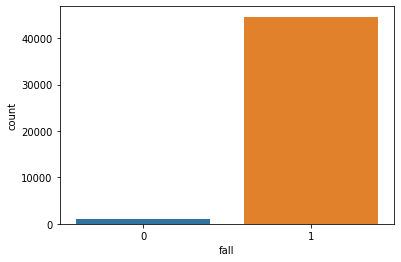

In [42]:
sns.countplot(x='fall', data=data)
pass

Класс сильно не сбалансирован, следовательно не получится обучить распознавать "0" значение. Поэтому сокращу количество элементов со значением "1".

In [43]:
data_1 = data_1[0: data_0.shape[0]]
data = pd.concat((data_0, data_1), axis = 0)
data

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,0,1,0,327,21.0,0,1880.0,50.77500,6.08333,16775
1,1,2,0,191,720.0,0,1951.0,56.18333,10.23333,16979
2,5,6,0,84,107000.0,0,1952.0,54.21667,-113.00000,16919
3,9,10,0,0,1914.0,0,1976.0,16.88333,-99.90000,9103
4,405,370,0,333,780.0,0,1902.0,-33.16667,-64.95000,841
...,...,...,...,...,...,...,...,...,...,...
2209,1124,1024,0,82,11.0,1,1985.0,-76.85600,156.32705,5817
2210,1125,1025,0,333,411.1,1,1986.0,-76.69517,159.36667,5328
2211,1126,1026,0,184,309.0,1,1986.0,-76.71667,159.66667,5514
2212,1127,1027,0,333,264.5,1,1986.0,-76.72584,159.40905,5570


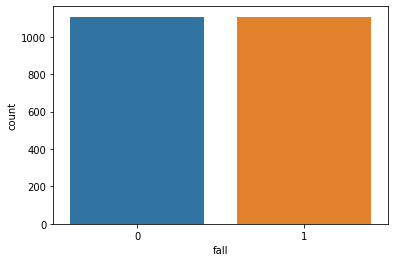

In [44]:
sns.countplot(x='fall', data=data)
pass

<div class="alert alert-block alert-info">
<b>Тестовая и обучающая выборки</b></div>

In [45]:
X = data.drop('fall', axis = 1) 
y = data['fall']
feature_names = X.columns

In [46]:
type(feature_names)

pandas.core.indexes.base.Index

In [47]:
feature_names

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [48]:
X = X.to_numpy()

In [49]:
y = y.to_numpy(dtype='int32')

In [50]:
y


array([0, 0, 0, ..., 1, 1, 1])

In [51]:
print(X.shape)
print(y.shape)
N, d = X.shape

(2214, 9)
(2214,)


In [52]:
type(X)

numpy.ndarray

In [53]:
type(y)

numpy.ndarray

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print('Количество обучающих и тестовых данных =  ' + str(N_train) + ' и ' + str(N_test))

Количество обучающих и тестовых данных =  1549 и 665


<div class="alert alert-block alert-info">
<b>Обучение полносвязной нейронной сети</b></div>

<div class="alert alert-block alert-info">
<b>1 скрытый слой.</b></div>

In [55]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (50,),
                          solver = 'adam', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 42,
                          verbose=1,
                          tol=1e-3)

In [56]:
%%time
mlp_model.fit(X_train, y_train)

Iteration 1, loss = 0.72856508
Iteration 2, loss = 0.67545811
Iteration 3, loss = 0.62899965
Iteration 4, loss = 0.59354164
Iteration 5, loss = 0.56681670
Iteration 6, loss = 0.54168894
Iteration 7, loss = 0.51585100
Iteration 8, loss = 0.49219477
Iteration 9, loss = 0.46402563
Iteration 10, loss = 0.42496388
Iteration 11, loss = 0.40083186
Iteration 12, loss = 0.38263416
Iteration 13, loss = 0.36602330
Iteration 14, loss = 0.35143777
Iteration 15, loss = 0.33864988
Iteration 16, loss = 0.32770086
Iteration 17, loss = 0.31682995
Iteration 18, loss = 0.30721340
Iteration 19, loss = 0.29868125
Iteration 20, loss = 0.29138022
Iteration 21, loss = 0.28280748
Iteration 22, loss = 0.27592288
Iteration 23, loss = 0.26882338
Iteration 24, loss = 0.26137077
Iteration 25, loss = 0.25467294
Iteration 26, loss = 0.24738585
Iteration 27, loss = 0.24138821
Iteration 28, loss = 0.23516930
Iteration 29, loss = 0.23036201
Iteration 30, loss = 0.22454512
Iteration 31, loss = 0.21990487
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), max_iter=2000,
              random_state=42, tol=0.001, verbose=1)

Ошибка на тестовой выборке

In [57]:
y_test_predict = mlp_model.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.03308270676691729

Ошибка на тренировочной выборке

In [58]:
y_train_predict = mlp_model.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.03744351194318916

<div class="alert alert-block alert-info">
<b>2 скрытых слоя.</b></div>

In [59]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (50, 12),
                          solver = 'adam', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 42,
                          verbose=1,
                          tol=1e-3)

In [60]:
%%time
mlp_model.fit(X_train, y_train)

Iteration 1, loss = 0.72294075
Iteration 2, loss = 0.70024172
Iteration 3, loss = 0.68209711
Iteration 4, loss = 0.66547633
Iteration 5, loss = 0.64638558
Iteration 6, loss = 0.62509223
Iteration 7, loss = 0.60259045
Iteration 8, loss = 0.57624483
Iteration 9, loss = 0.54648064
Iteration 10, loss = 0.51947065
Iteration 11, loss = 0.49414607
Iteration 12, loss = 0.46912080
Iteration 13, loss = 0.44536494
Iteration 14, loss = 0.42340821
Iteration 15, loss = 0.40299389
Iteration 16, loss = 0.38386180
Iteration 17, loss = 0.36542368
Iteration 18, loss = 0.34764926
Iteration 19, loss = 0.33187556
Iteration 20, loss = 0.31743434
Iteration 21, loss = 0.30460653
Iteration 22, loss = 0.29251051
Iteration 23, loss = 0.28204276
Iteration 24, loss = 0.27194656
Iteration 25, loss = 0.26274179
Iteration 26, loss = 0.25421696
Iteration 27, loss = 0.24620554
Iteration 28, loss = 0.23847774
Iteration 29, loss = 0.23073563
Iteration 30, loss = 0.22281817
Iteration 31, loss = 0.21658709
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 12), max_iter=2000,
              random_state=42, tol=0.001, verbose=1)

Ошибка на тестовой выборке

In [61]:
y_test_predict = mlp_model.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.021052631578947368

Ошибка на тренировочной выборке

In [62]:
y_train_predict = mlp_model.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.0342156229825694

<em>Результаты практически не изменились, поэтому буду использовать 1 скрытый слой.</em>

<div class="alert alert-block alert-info">
<b>Подбор параметра альфа</b></div>

In [63]:
from sklearn.metrics import accuracy_score
import tqdm
alpha_arr = np.logspace(-5, 1, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm.tqdm_notebook(alpha_arr):
    mlp_model = MLPClassifier(alpha=alpha,
                              hidden_layer_sizes = (50,),
                              solver = 'adam', 
                              activation = 'logistic',
                              max_iter=2000,
                              random_state = 42,
                              #verbose=1,
                              tol=1e-3)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

C:\Users\netwe\AppData\Local\Temp/ipykernel_15684/749961129.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for alpha in tqdm.tqdm_notebook(alpha_arr):


  0%|          | 0/21 [00:00<?, ?it/s]

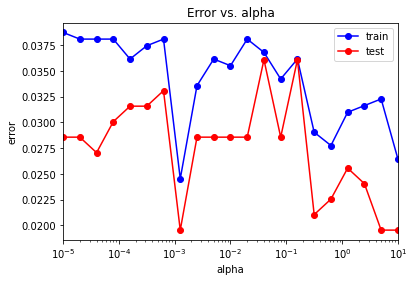

In [64]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

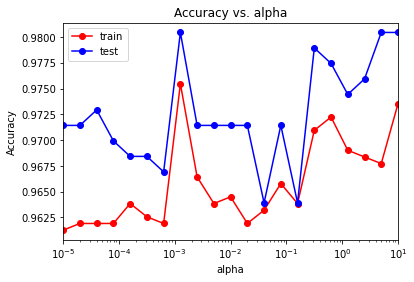

In [65]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [66]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.024531956100710135 0.019548872180451128


In [67]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[1.25892541e-03 5.01187234e+00 1.00000000e+01]


In [68]:
alpha_opt = alpha_opt[0]

<div class="alert alert-block alert-info">
<b>Подбор количества нейронов</b></div>

In [69]:
from sklearn.metrics import accuracy_score
import tqdm
neurons_count_arr = np.array([i for i in range(2, 100+1)])
test_err = []
train_err = []
train_acc = []
test_acc = []

for neurons_count in tqdm.tqdm_notebook(neurons_count_arr):
    mlp_model = MLPClassifier(alpha=alpha_opt,
                              hidden_layer_sizes = (neurons_count,),
                              solver = 'adam', 
                              activation = 'logistic',
                              max_iter=2000,
                              random_state = 42,
                              #verbose=1,
                              tol=1e-3)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

C:\Users\netwe\AppData\Local\Temp/ipykernel_15684/1571838247.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for neurons_count in tqdm.tqdm_notebook(neurons_count_arr):


  0%|          | 0/99 [00:00<?, ?it/s]

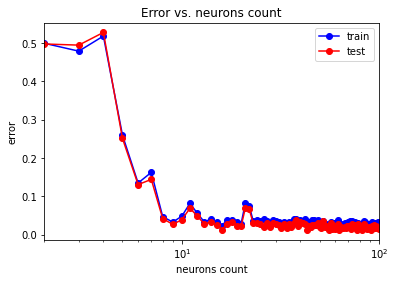

In [70]:
plt.semilogx(neurons_count_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neurons_count_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neurons_count_arr), np.max(neurons_count_arr)])
plt.title('Error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()

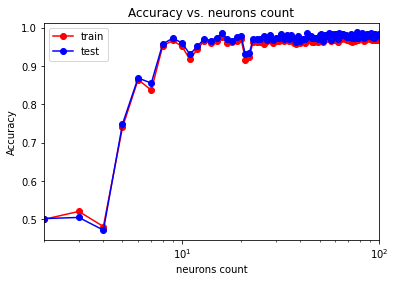

In [71]:
plt.semilogx(neurons_count_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(neurons_count_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(neurons_count_arr), np.max(neurons_count_arr)])
plt.title('Accuracy vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('Accuracy')
plt.legend()

In [72]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)
neuro_opt = neurons_count_arr[test_err == min_test_err][0]
print(neuro_opt)

0.02130406714009038 0.012030075187969926
77


Беру 77 нейронов, так как с данным числом получается минимальная ошибка.

<div class="alert alert-block alert-info">
<b>Обучение с оптимальными параметрами </b></div>

In [73]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (neuro_opt,),
                          alpha=alpha_opt,
                          solver = 'adam', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 42,
                          #verbose=1,
                          tol=1e-3)

In [74]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 1.28 s


MLPClassifier(activation='logistic', alpha=0.0012589254117941675,
              hidden_layer_sizes=(77,), max_iter=2000, random_state=42,
              tol=0.001)

Ошибка на тестовой выборке

In [75]:
y_test_predict = mlp_model.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.012030075187969926

Ошибка на тренировочной выборке

In [76]:
y_train_predict = mlp_model.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.02130406714009038

<div class="alert alert-block alert-info">
<b>Матрца рассогласования</b></div>

In [77]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[331   2]
 [  8 324]]


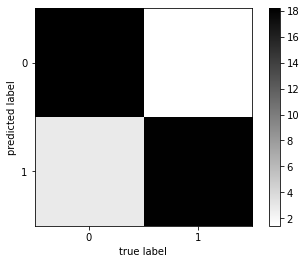

In [78]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

<div class="alert alert-block alert-info">
<b>Вывод</b></div>

<em> В данной работе была обучена полносвязная нейронная сеть. Нашла оптимальные параметры по точности и времени обучения: 1 слой с 77 нейронами и  параметр альфа = 1.25892541e-03.
 С такими параметрами ошибка = 1.2%. Данный резльтат является хорошим показателем обучения нейронной сети. Но нужно учесть, что размер датасета был уменьшен, чтобы нейросеть смогла обучиться. В изначальном виде нейронная сеть не смогла распознать элементы "0", так как их количество было недостаточным, по сравнению с элементами "1". Сильного переобучения или недообучения не наблюдается, так как результаты на обучающей и тестовой выборках хорошие. </em> 